# SMS Spam Detection 

In [255]:
import numpy as np 
import pandas as pd

In [256]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [257]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [258]:
df.shape

(5572, 5)

In [259]:
# 1. Data cleaning 
# 2. EDA (Exploratory Data Analysis)
# 3. Text Preprocessing
# 4. Model Building 
# 5. Evaluation 
# 6. Improvement
# 7. website 
# 8. Deploy

# 1. Data cleaning 

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [261]:
# drop last 3 columns
df.drop(['Unnamed: 2' ,'Unnamed: 3' , 'Unnamed: 4'] ,axis=1 ,  inplace=True)

In [262]:
df.sample(5)

,v1,v2
2318,ham,On the way to office da..
5082,ham,Amazing : If you rearrange these letters it gi...
1805,ham,God bless.get good sleep my dear...i will pray!
4147,spam,Please call Amanda with regard to renewing or ...
4246,spam,Text PASS to 69669 to collect your polyphonic ...


In [263]:
# renamin the cols
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)

In [264]:
df.sample(5)

,target,text
971,ham,"Haha awesome, omw back now then"
3273,ham,Thanx a lot...
3890,ham,No problem. We will be spending a lot of quali...
3537,ham,We are pleased to inform that your application...
2389,ham,Boo. How's things? I'm back at home and a litt...


In [265]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [266]:
df['target'] = encoder.fit_transform(df['target'])

In [267]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [268]:
# check for duplicate values
df.duplicated().sum()

403

In [269]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [270]:
df.duplicated().sum()

0

In [271]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [272]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [273]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

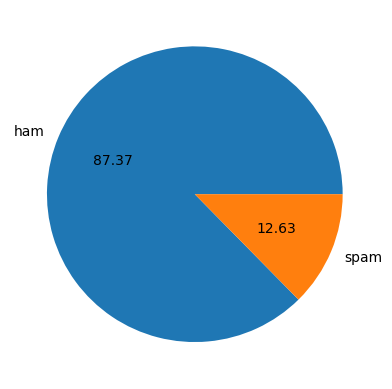

In [274]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts() , labels=['ham' , 'spam'] , autopct="%0.2f")
plt.show()

# Data is imbalanced 

In [275]:
import nltk

In [276]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Mega
[nltk_data]     Computers\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [277]:
df['num_characters'] = df['text'].apply(len)

In [278]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [279]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [280]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [281]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [282]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [283]:
df[['num_characters' ,'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [284]:
# ham 
df[df['target'] == 0][['num_characters' ,'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [285]:
# spam 
df[df['target'] == 1][['num_characters' ,'num_words' ,'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [286]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

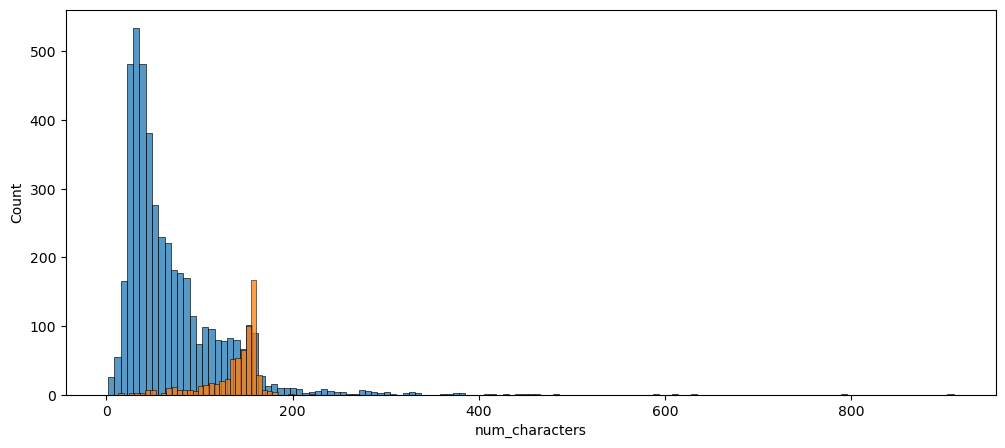

In [287]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

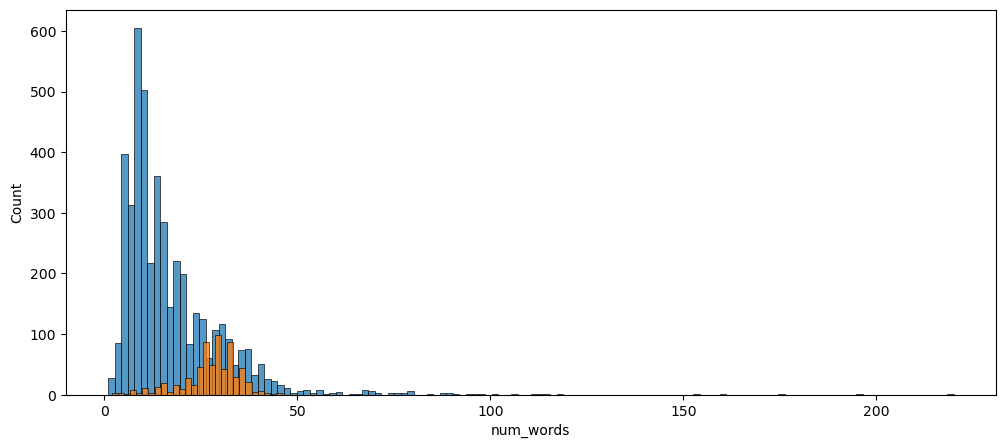

In [288]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

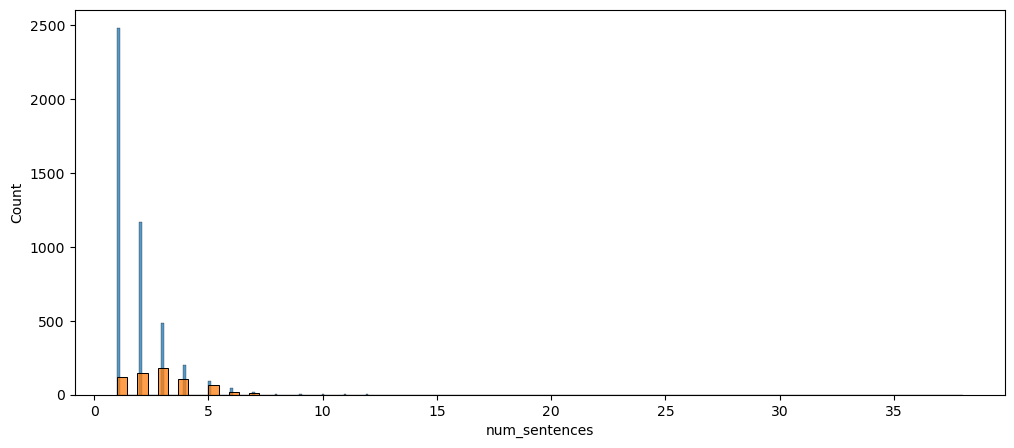

In [289]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'])

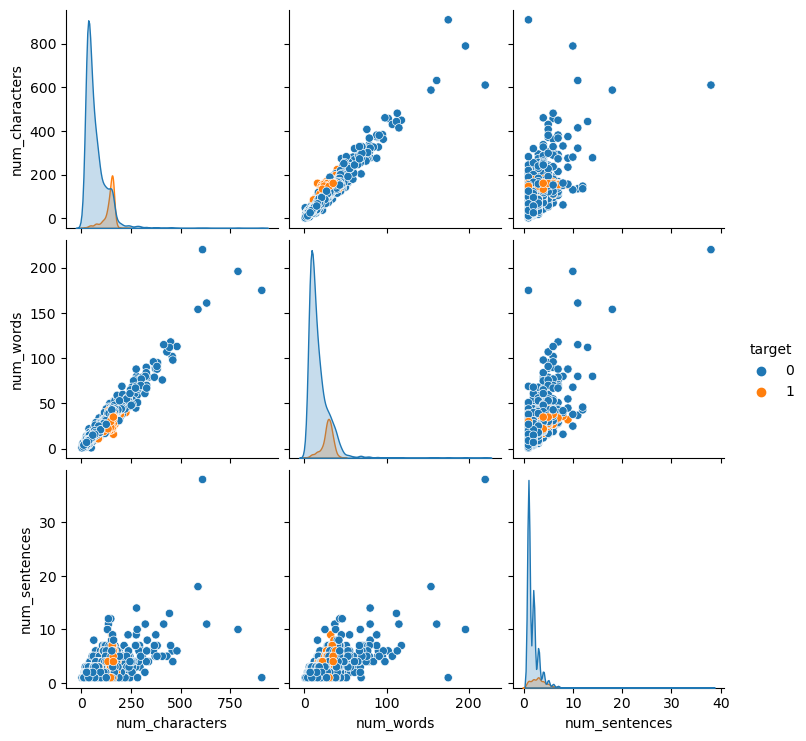

In [290]:
sns.pairplot(df , hue='target')

C:\Users\Mega Computers\AppData\Local\Temp\ipykernel_22668\3564728520.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr() , annot=True)


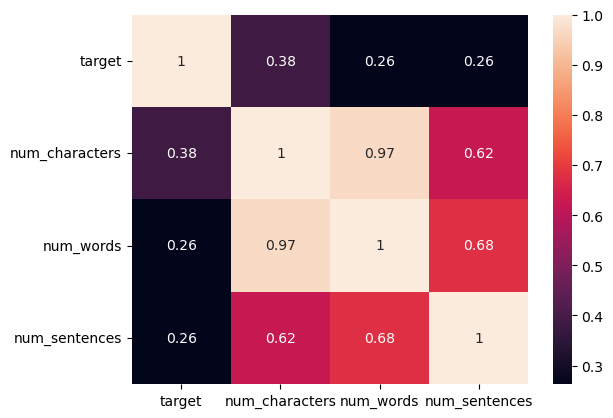

In [291]:
sns.heatmap(df.corr() , annot=True)
plt.show()

# 3. Text or Data Preprocessing
* Lower case 
* Tokenization
* Removing Special Characters
* Removing stop words and punctuation
* stemming

In [292]:
# stop words
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [293]:
# this is punctuation 
import string
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [294]:
def transform_text(text):
    # convert into lower case 
    text = text.lower()
    # tokenization 
    text = nltk.word_tokenize(text)
    
    #removing special character
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
     
    # stop words and Punctuation
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    # apply stemming 
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [295]:
transform_text('I loved the YT lectures on Machine Learning. How about You')

'love yt lectur machin learn'

In [296]:
transform_text("Nah I don't think he goes to usf, he lives around here though")

'nah think goe usf live around though'

In [297]:
df['text'][4]

"Nah I don't think he goes to usf, he lives around here though"

In [298]:
df['text'][55]

'Do you know what Mallika Sherawat did yesterday? Find out now @  &lt;URL&gt;'

In [299]:
# this is stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("loving" , "thinking")

'love'

In [300]:
# used all text apply on transform text 
df['transformed_text'] =  df['text'].apply(transform_text)

In [301]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### first install wordcloud

In [302]:
# the wordcloud is work on the important message is show in big word

In [303]:
pip install wordcloud 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [304]:
import wordcloud

In [305]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=10 , background_color='white')

In [306]:
# for spam Messages
spam_wc = wc.generate(df[df['target'] == 1 ]['transformed_text'].str.cat(sep=" ") )

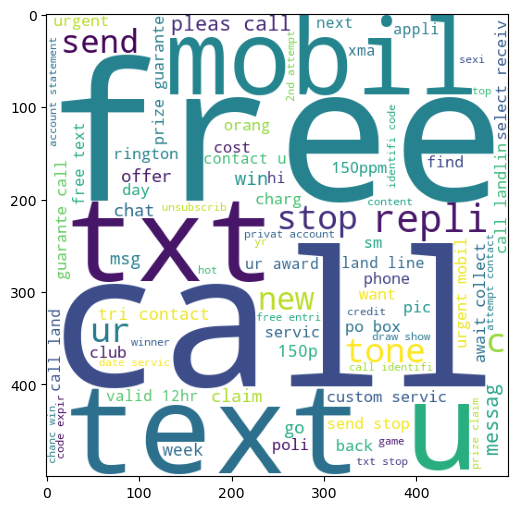

In [307]:
plt.figure(figsize=(15 , 6))
plt.imshow(spam_wc)

In [308]:
# for ham Messages
ham_wc = wc.generate(df[df['target'] == 0 ]['transformed_text'].str.cat(sep=" ") )

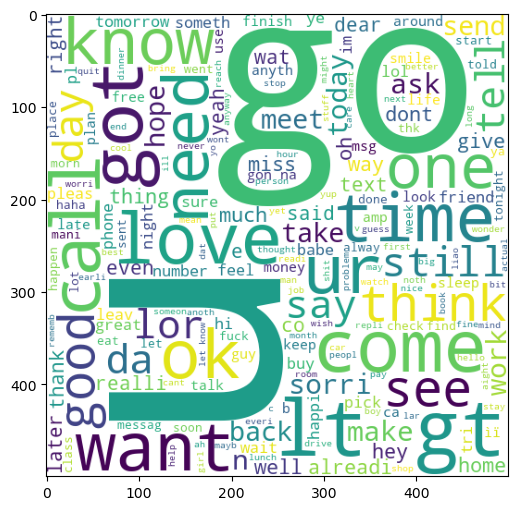

In [309]:
plt.figure(figsize=(15 , 6))
plt.imshow(ham_wc)

In [310]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Spam And Ham most top 30 word

In [311]:
len(df[df['target'] == 1]['transformed_text'].tolist())

653

In [312]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [313]:
len(spam_corpus)

9939

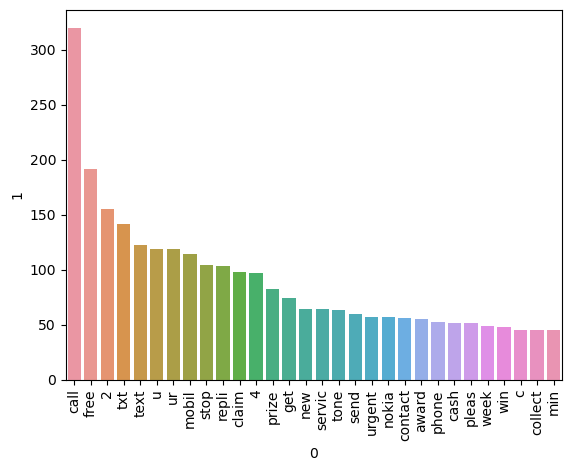

In [314]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0] , y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1] )
plt.xticks(rotation='vertical')
plt.show()

In [315]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [316]:
len(ham_corpus)

35404

In [317]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

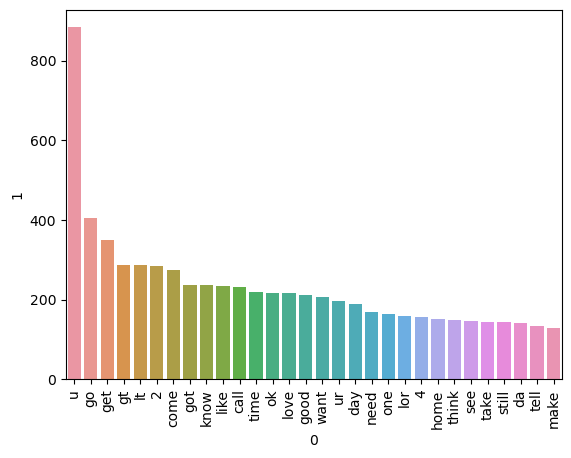

In [318]:
from collections import Counter
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0] , y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1] )
plt.xticks(rotation='vertical')
plt.show()

In [319]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building 

In [384]:
# first the text data convert into number 
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf =  TfidfVectorizer(max_features=3000)

In [385]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [382]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [383]:
# append the num_chatacter col to x

#X = np.hstack((X , df['num_characters'].values.reshape(-1 , 1)))

In [386]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [387]:
y = df['target'].values


In [388]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [389]:
from sklearn.model_selection import train_test_split 

In [390]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=2)

In [391]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(4135, 3000) (1034, 3000) (4135,) (1034,)


In [392]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [393]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [394]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [395]:
gnb.score(X_test , y_test)

0.8694390715667312

In [396]:
gnb.score(X_train , y_train)

0.8931076178960097

In [397]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score( y_test , y_pred2 ))
print(confusion_matrix( y_test ,y_pred2 ))
print(precision_score( y_test , y_pred2  ))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [398]:
mnb.score(X_test , y_test)

0.9709864603481625

In [399]:
mnb.score(X_train , y_train)

0.9789600967351875

In [338]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score( y_test , y_pred3 ))
print(confusion_matrix( y_test ,y_pred3 ))
print(precision_score( y_test , y_pred3  ))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [339]:
bnb.score(X_test , y_test)

0.9835589941972921

In [340]:
bnb.score(X_train , y_train)

0.9857315598548972

In [341]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score  # Re-import the metrics functions

svc = SVC()
lrc = LogisticRegression()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbd = GradientBoostingClassifier()
xgb = XGBClassifier()

clfs = {
    'svc': svc,
    'lrc': lrc,
    'mnb': mnb,
    'dtc': dtc,
    'knc': knc,
    'rfc': rfc,
    'abc': abc,
    'bc': bc,
    'etc': etc,
    'gbd': gbd,
    'xgb': xgb
}

for name, md in clfs.items():
    try:
        md.fit(X_train, y_train)
        y_pred = md.predict(X_test)
        print(f"{name} with accuracy {accuracy_score(y_test, y_pred)} And precision {precision_score(y_test, y_pred) }")
    except Exception as e:
        print(f"Error with {name}: {str(e)}")


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


svc with accuracy 0.8665377176015474 And precision 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


lrc with accuracy 0.9671179883945842 And precision 0.9905660377358491
mnb with accuracy 0.9410058027079303 And precision 1.0
dtc with accuracy 0.9516441005802708 And precision 0.8492063492063492
knc with accuracy 0.9284332688588007 And precision 0.7758620689655172
rfc with accuracy 0.9729206963249516 And precision 0.9741379310344828
abc with accuracy 0.9642166344294004 And precision 0.9316239316239316
bc with accuracy 0.9632495164410058 And precision 0.8968253968253969
etc with accuracy 0.9777562862669246 And precision 0.9752066115702479
gbd with accuracy 0.9584139264990329 And precision 0.9279279279279279
xgb with accuracy 0.9709864603481625 And precision 0.9354838709677419


In [342]:
# tfidf  ---> mnb

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [344]:
svc = SVC(kernel='sigmoid' , gamma=1.0 )
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)
abc = AdaBoostClassifier(n_estimators=50 , random_state=2)
bc = BaggingClassifier(n_estimators=50 , random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
gbd = GradientBoostingClassifier(n_estimators=50 , random_state=2)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [345]:
clfs = {
    'svc': svc,
    'lrc':lrc,
    'mnb':mnb,
    'dtc':dtc,
    'knc':knc,
    'rfc':rfc,
    'abc':abc,
    'bc':bc,
    'etc':etc,
    'gbd':gbd,
    'xgb':xgb,
}


In [346]:
from sklearn.metrics import accuracy_score, precision_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  # Changed from clfs to clf
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Added average parameter
    
    return accuracy, precision

# Make sure svc is a classifier object, not a tuple
from sklearn.svm import SVC
svc = SVC()  # Create an SVC classifier object

# Now call the function
accuracy, precision = train_classifier(svc, X_train, y_train, X_test, y_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.8665377176015474
Precision: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [347]:
def train_classifiers(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  # Changed from clfs to clf
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')  # Added average parameter
    
    return accuracy, precision

In [348]:
accuracy, precision = train_classifiers(svc, X_train, y_train, X_test, y_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.8665377176015474
Precision: 0.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [349]:
accuracy_scores = []
precision_scores = []

for name , clf in clfs.items():
    current_accuracy , current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("For " , name )
    print("Accuracy :" , current_accuracy)
    print ("Precision:" , current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  svc
Accuracy : 0.8665377176015474
Precision: 0.0
For  lrc
Accuracy : 0.9613152804642167
Precision: 0.9622641509433962
For  mnb
Accuracy : 0.9410058027079303
Precision: 1.0
For  dtc
Accuracy : 0.9448742746615088
Precision: 0.8857142857142857
For  knc
Accuracy : 0.9284332688588007
Precision: 0.7758620689655172
For  rfc
Accuracy : 0.9690522243713733
Precision: 0.9818181818181818
For  abc
Accuracy : 0.9642166344294004
Precision: 0.9316239316239316
For  bc
Accuracy : 0.9661508704061895
Precision: 0.8992248062015504
For  etc
Accuracy : 0.9787234042553191
Precision: 0.9754098360655737
For  gbd
Accuracy : 0.9516441005802708
Precision: 0.9313725490196079
For  xgb
Accuracy : 0.9690522243713733
Precision: 0.9416666666666667


In [378]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys() , 'Accuracy':accuracy_scores , 'Precision':precision_scores}).sort_values('Precision' ,  ascending=False)

In [379]:
performance_df

,Algorithm,Accuracy,Precision
2,mnb,0.941006,1.000000
5,rfc,0.969052,0.981818
8,etc,0.978723,0.975410
1,lrc,0.961315,0.962264
10,xgb,0.969052,0.941667
6,abc,0.964217,0.931624
9,gbd,0.951644,0.931373
7,bc,0.966151,0.899225
3,dtc,0.944874,0.885714
4,knc,0.928433,0.775862


In [352]:
performance_df1 = pd.melt(performance_df , id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,etc,Accuracy,0.978723
1,rfc,Accuracy,0.969052
2,xgb,Accuracy,0.969052
3,bc,Accuracy,0.966151
4,abc,Accuracy,0.964217
5,lrc,Accuracy,0.961315
6,gbd,Accuracy,0.951644
7,dtc,Accuracy,0.944874
8,mnb,Accuracy,0.941006
9,knc,Accuracy,0.928433


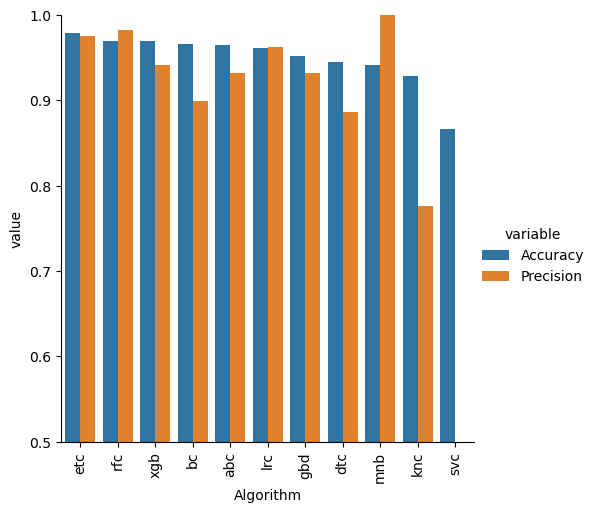

In [353]:
sns.catplot(x='Algorithm' , y='value', hue='variable' , data=performance_df1 , kind='bar' , height=5)

plt.ylim(0.5 , 1.0)
plt.xticks(rotation='vertical')
plt.show()

### Model improve
### 1.change the max_feature parameter of Tfidf

In [354]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy_max_ft_3000':accuracy_scores , 'Precision_max_ft_3000':precision}  )

In [355]:
performance_df.merge(temp_df , on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,etc,0.978723,0.975410,0.978723,0.0
1,rfc,0.969052,0.981818,0.969052,0.0
2,xgb,0.969052,0.941667,0.969052,0.0
3,bc,0.966151,0.899225,0.966151,0.0
4,abc,0.964217,0.931624,0.964217,0.0
5,lrc,0.961315,0.962264,0.961315,0.0
6,gbd,0.951644,0.931373,0.951644,0.0
7,dtc,0.944874,0.885714,0.944874,0.0
8,mnb,0.941006,1.000000,0.941006,0.0
9,knc,0.928433,0.775862,0.928433,0.0


# scaling

In [356]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys() , 'Accuracy_scaling':accuracy_scores , 'Precision_scaling':precision}  )

In [357]:
#new_df = performance_df.merge(temp_df , on='Algorithm')

In [358]:
#new_df_scaled = new_df.merge(temp_df , on='Algorithm')

In [359]:
#new_df_scaled

In [361]:
# voting  Classifier 
svc = SVC(kernel='sigmoid' , gamma=1.0 , probability=True)
mnb =  MultinomialNB()
ect = ExtraTreesClassifier(n_estimators=50 , random_state=2)

from sklearn.ensemble import VotingClassifier


In [362]:
voting = VotingClassifier(estimators=[('svm' , svc) , ('nb',mnb) , ('et' , etc)], voting='soft')

In [363]:
voting.fit(X_train , y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [364]:
y_pred = voting.predict(X_test)
print("Accuracy :" , accuracy_score(y_test , y_pred))
print ("Precision:" , precision_score(y_test , y_pred))

Accuracy : 0.941972920696325
Precision: 1.0


In [366]:
# Apply stacking
estimators = [('svm' ,svc) , ('nb' , mnb) , ('et' ,etc)]
final_estimator=RandomForestClassifier()

In [368]:
from sklearn.ensemble import StackingClassifier


In [371]:
clf = StackingClassifier(estimators=estimators , final_estimator=final_estimator)

In [372]:
clf.fit(X_train , y_train)


StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [373]:
y_pred = clf.predict(X_test)
print("Accuracy :" , accuracy_score(y_test , y_pred))
print ("Precision:" , precision_score(y_test , y_pred))

Accuracy : 0.97678916827853
Precision: 0.9453125


In [400]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))

In [ ]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))